# Análise de Dados CEP das Capitais

[API ViaCEP](https://viacep.com.br/)

Importando bibliotecas que serão usadas no projeto

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Lendo e visualizando os dados

In [2]:
df = pd.read_csv('dados_cep.csv', sep=';', encoding='utf-8')
df.sample(5)

,cep,logradouro,complemento,bairro,localidade,uf,ibge,gia,ddd,siafi
1050,49010-470,Praça da Bandeira,de 291 ao fim - lado ímpar,Centro,Aracaju,SE,2800308,NaN,79,3105
1015,05386-210,Praça Arruda,NaN,Vila Dalva,São Paulo,SP,3550308,1004.0,11,7107
279,29065-770,Praça Oreste Volponi,NaN,Mata da Praia,Vitória,ES,3205309,NaN,27,5705
1088,77001-908,Praça Girassóis,s/n,Plano Diretor Norte,Palmas,TO,1721000,NaN,63,9733
979,88054-072,Praça República do Líbano,NaN,Canasvieiras,Florianópolis,SC,4205407,NaN,48,8105


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cep          1096 non-null   object 
 1   logradouro   1096 non-null   object 
 2   complemento  112 non-null    object 
 3   bairro       1096 non-null   object 
 4   localidade   1096 non-null   object 
 5   uf           1096 non-null   object 
 6   ibge         1096 non-null   int64  
 7   gia          50 non-null     float64
 8   ddd          1096 non-null   int64  
 9   siafi        1096 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 85.8+ KB


Verificando dados ausentes

In [4]:
df.isnull().sum()

cep               0
logradouro        0
complemento     984
bairro            0
localidade        0
uf                0
ibge              0
gia            1046
ddd               0
siafi             0
dtype: int64

Preenchendo dados faltantes 

In [5]:
df.fillna(value={'complemento': 's/n'}, inplace=True)

Trocando o tipo de dado da coluna gia

In [6]:
df['gia'] = df['gia'].astype('Int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   cep          1096 non-null   object
 1   logradouro   1096 non-null   object
 2   complemento  1096 non-null   object
 3   bairro       1096 non-null   object
 4   localidade   1096 non-null   object
 5   uf           1096 non-null   object
 6   ibge         1096 non-null   int64 
 7   gia          50 non-null     Int64 
 8   ddd          1096 non-null   int64 
 9   siafi        1096 non-null   int64 
dtypes: Int64(1), int64(3), object(6)
memory usage: 86.8+ KB


In [8]:
df.sample(5)

,cep,logradouro,complemento,bairro,localidade,uf,ibge,gia,ddd,siafi
589,58015-030,Praça João XXIII,s/n,Jaguaribe,João Pessoa,PB,2507507,<NA>,83,2051
315,74305-050,Praça C6,s/n,Setor Sudoeste,Goiânia,GO,5208707,<NA>,62,9373
488,31620-410,Praça Creta,s/n,Europa,Belo Horizonte,MG,3106200,<NA>,31,4123
881,91380-400,Praça Itu,s/n,Jardim Itu,Porto Alegre,RS,4314902,<NA>,51,8801
155,60751-170,Praça Guadalajara,s/n,Prefeito José Walter,Fortaleza,CE,2304400,<NA>,85,1389


Verificando se tem linhas duplicadas

In [9]:
df.duplicated().sum()

0

Verificando se tem CEP duplicados

In [10]:
df['cep'].duplicated().sum()

0

Verificando dados únicos

In [11]:
df.nunique()

cep            1096
logradouro      853
complemento      68
bairro          506
localidade       29
uf               27
ibge             29
gia               1
ddd              28
siafi            29
dtype: int64

In [12]:
# Procurando os dados que não fazem parte das capitais
df['localidade'].unique()

array(['Rio Branco', 'Maceió', 'Macapá', 'Manaus', 'Salvador',
       'Fortaleza', 'Brasília', 'Vitória', 'Aparecida de Goiânia',
       'Goiânia', 'São Luís', 'São Luís Gonzaga do Maranhão', 'Cuiabá',
       'Campo Grande', 'Belo Horizonte', 'Belém', 'João Pessoa',
       'Curitiba', 'Recife', 'Teresina', 'Rio de Janeiro', 'Natal',
       'Porto Alegre', 'Porto Velho', 'Boa Vista', 'Florianópolis',
       'São Paulo', 'Aracaju', 'Palmas'], dtype=object)

In [13]:
# Localizações a remover
localidades_remover = ['Aparecida de Goiânia', 'São Luís Gonzaga do Maranhão']

df.drop(df[df['localidade'].isin(localidades_remover)].index, inplace=True)
df.nunique()

cep            1090
logradouro      850
complemento      68
bairro          503
localidade       27
uf               27
ibge             27
gia               1
ddd              27
siafi            27
dtype: int64

### Análise Exploratória

In [14]:
df.describe()

,ibge,gia,ddd,siafi
count,1.090000e+03,50.0,1090.000000,1090.000000
mean,3.240439e+06,1004.0,64.155963,4789.368807
std,1.149320e+06,0.0,24.620079,3246.776349
min,1.100205e+06,1004.0,11.000000,3.000000
25%,2.408102e+06,1004.0,48.000000,1761.000000
50%,2.927408e+06,1004.0,67.000000,4123.000000
75%,4.205407e+06,1004.0,84.000000,8105.000000
max,5.300108e+06,1004.0,98.000000,9733.000000


Contagem de CEP por Localidade

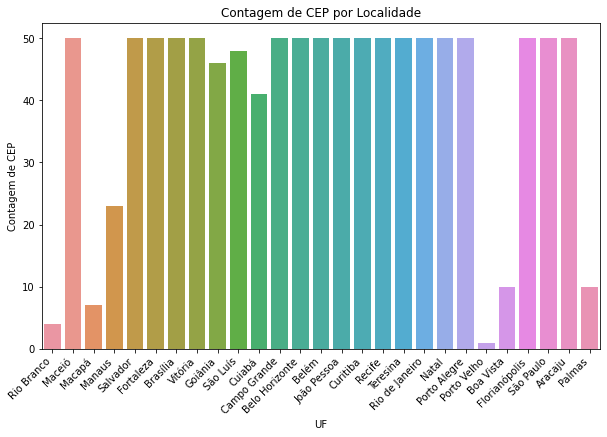

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='localidade', data=df)

plt.xlabel('UF')
plt.ylabel('Contagem de CEP')
plt.title('Contagem de CEP por Localidade')
plt.xticks(rotation=45, ha='right')  

plt.show()

In [16]:
cont_cep = df.groupby('localidade')['cep'].count().reset_index(name='contagem')
cont_cep

,localidade,contagem
0,Aracaju,50
1,Belo Horizonte,50
2,Belém,50
3,Boa Vista,10
4,Brasília,50
5,Campo Grande,50
6,Cuiabá,41
7,Curitiba,50
8,Florianópolis,50
9,Fortaleza,50


As 4 capitais com menor quantidade de praças

In [17]:
cont_cep.nsmallest(4, 'contagem')

,localidade,contagem
18,Porto Velho,1
20,Rio Branco,4
12,Macapá,7
3,Boa Vista,10


In [18]:
# Lendo arquivo auxiliar com dados demograficos para buscar uma relação
df_pop = pd.read_csv('populacao/dados_demograficos.csv', sep=';', encoding='utf-8')

# Apagando colunas que não irei usar nessa rápida análise
df_pop = df_pop.drop('area_km2', axis=1) 
df_pop = df_pop.drop('populacao_res_2000', axis=1) 
df_pop = df_pop.drop('populacao_res_2010', axis=1)
df_pop = df_pop.drop('populacao_res_2022', axis=1)
df_pop = df_pop.drop('densidade_2000', axis=1)
df_pop = df_pop.drop('densidade_2010', axis=1)

# As 4 capitais com menores densidade 
df_pop.nsmallest(4, 'densidade_2022')

,localidade,densidade_2022
0,Porto Velho,13.5
1,Rio Branco,41.3
5,Macapá,67.5
3,Boa Vista,72.7


**Nessa comparação dá para notar que as capitais com menor densidade tendem a ter menor quantia de praças.**

Contagem de GIA por UF

In [19]:
cont_gia = df.groupby('uf')['gia'].count().reset_index(name='contagem')
cont_gia

,uf,contagem
0,AC,0
1,AL,0
2,AM,0
3,AP,0
4,BA,0
5,CE,0
6,DF,0
7,ES,0
8,GO,0
9,MA,0


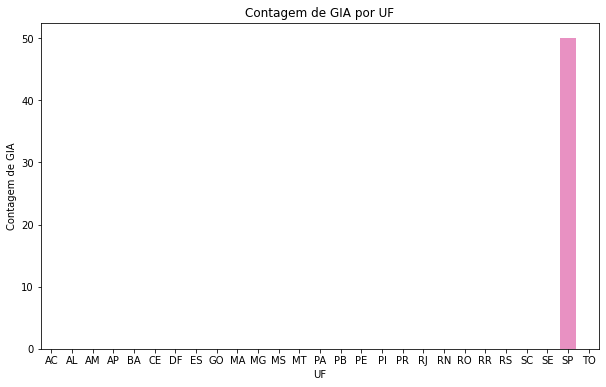

In [20]:
plt.figure(figsize=(10, 6))
sns.barplot(x='uf', y='contagem', data=cont_gia)

plt.xlabel('UF')
plt.ylabel('Contagem de GIA')
plt.title('Contagem de GIA por UF')

plt.show()

Dá para notar que o único estado que possui GIA é São Paulo. Por ser um documento obrigatório nos municípios paulistas, para a apuração de ICMS.

Salvando arquivo com dados tratados em .csv

In [21]:
df.to_csv('dados_cep_tratados.csv', sep=';', index=False, encoding='utf-8')